# Fast Food Marketing Campaign A/B Testing

A fast-food chain plans to add a new item to its menu. However, 
they are still undecided between three possible marketing campaigns for promoting the new product.
In order to determine which promotion has the greatest effect on sales, the new item is introduced 
at locations in several randomly selected markets.

A different promotion is used at each location, and the weekly sales of the new item are recorded 
for the first four weeks.

In [1]:
# importing Libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Loading the dataset
dataset = pd.read_csv("WA_Marketing-Campaign.csv")

In [39]:
dataset.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


Here, MarketID, LocationID, Promotion and Week combined makes a Unique Key for the dataset provided for the Marketing Campaign by the Fast Food Chain. 

Thus checking whether we have duplicate observation for the dataset provided.

In [4]:
# Checking for duplicate observation for unique id (MarketID,LocationID,Promotion,Week)
dataset.duplicated(subset=["MarketID","LocationID","Promotion","week"]).sum()

0

We don't have any duplicate observation in the market campaign dataset.

In [5]:
# Collecting meta data about the original data provided
dataset.shape

(548, 7)

In [40]:
# Datatypes of the coumns
dataset.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

We have 6 numerical features and 1 feature with Object Data Types

In [6]:
# Checking for null values 
dataset.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

We don't have any null values in the dataset.

In [7]:
# Names of the columns
dataset.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

We have 5 categorical features and 2 numerical features out of which our target variable is the "SalesInThousands" that we be used for the A/B Testing

In [41]:
# separating the qualitative data and quantitative data separately
dataset_cat = dataset.loc[:,["MarketID", "MarketSize", "LocationID", "Promotion","week"]]
dataset_num = dataset.loc[:,["AgeOfStore","SalesInThousands"]]

In [42]:
dataset_cat.head()

,MarketID,MarketSize,LocationID,Promotion,week
0,1,Medium,1,3,1
1,1,Medium,1,3,2
2,1,Medium,1,3,3
3,1,Medium,1,3,4
4,1,Medium,2,2,1


In [10]:
dataset_num.head()

,AgeOfStore,SalesInThousands
0,4,33.73
1,4,35.67
2,4,29.03
3,4,39.25
4,5,27.81


In [11]:
# Checking whether categorical features have appropiate levels
dataset_cat.nunique()

MarketID       10
MarketSize      3
LocationID    137
Promotion       3
week            4
dtype: int64

In [12]:
# Appropiate levels of Categorical Feature individually
for i in dataset_cat:
    print(i.upper()," :- ", dataset_cat[i].unique(),"\n")
    

MARKETID  :-  [ 1  2  3  4  5  6  7  8  9 10] 

MARKETSIZE  :-  ['Medium' 'Small' 'Large'] 

LOCATIONID  :-  [  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920] 

PROMOTION  :-  [3 2 1] 

WEEK  :-  [1 2 3 4] 



# Univariant Analysis 

### 1. MarketID

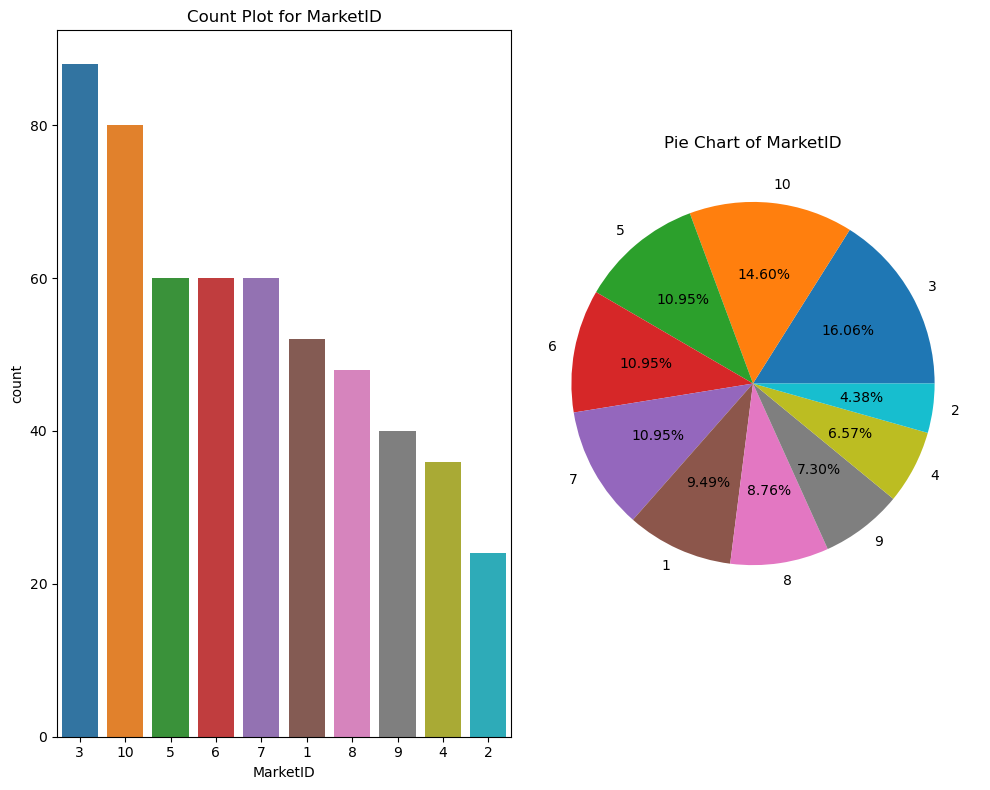

In [32]:
variable = "MarketID"

plt.figure(figsize = (10,8))

# Histogram plot
plt.subplot(1,2,1)
# sns.countplot(x=variable,data=dataset_cat,order = dataset_cat[variable].value_counts().index)
sns.countplot(x = dataset_cat[variable],data = dataset_cat,order = dataset_cat[variable].value_counts().index)
plt.title(f"Count Plot for {variable}")

# Pie Chart 
plt.subplot(1,2,2)
counts = dataset_cat[variable].value_counts()/4
plt.pie(counts,labels = counts.index ,autopct='%0.2f%%')
plt.title(f"Pie Chart of {variable}")

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

MartketID 3 and 10 were the markets which had most number of promotions being made, subsequently MarketID with 5,6 and 7 had eqaual number of promotions.

### 2. MarketSize

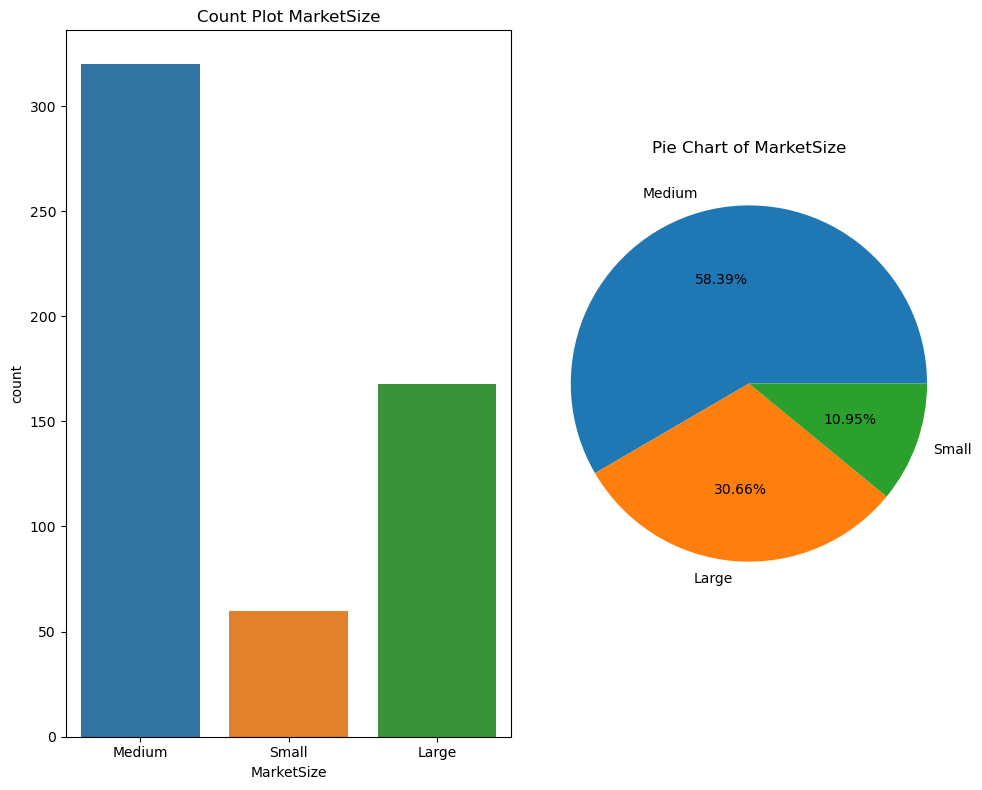

In [16]:
variable = "MarketSize"

plt.figure(figsize = (10,8))

# Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data = dataset_cat)
plt.title(f"Count Plot {variable}")

# Pie Chart 
plt.subplot(1,2,2)
counts = dataset_cat[variable].value_counts()
plt.pie(x=counts,labels = counts.index, autopct = "%0.2f%%" )
plt.title(f"Pie Chart of {variable}")

# Adjust layout
plt.tight_layout()

# Show Plot
plt.show()

Most of the promotions were made in the Medium size market followed by "Large" market size and least promotion were made in the "small" for the Fast Food chain.

### 3. LocationID

In [34]:
dataset_cat["LocationID"].value_counts().sort_index()

1      4
2      4
3      4
4      4
5      4
      ..
916    4
917    4
918    4
919    4
920    4
Name: LocationID, Length: 137, dtype: int64